# Gestion des recommandations

## Recuperation des données

In [1]:
import json
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import random

# Load the data
dir1 = "images"
dir2 = "ExifDatatest2.json"
dir = os.path.join(dir1, dir2)

data = pd.read_json(dir)
data['result'] = random.choices(["Yes", "No"], k=len(data))
print(data.head())
print(data.tail())

       theme                    image  width  height format orientation  \
0  Exoplanet          55_Cancri_b.jpg   1024     768    PNG     no exif   
1  Exoplanet         Gliese_876_e.jpg   1587     919    PNG     no exif   
2  Exoplanet                XO-3b.jpg    800     500   JPEG     no exif   
3  Exoplanet  OGLE-2005-BLG-169Lb.jpg   1271     746   JPEG     no exif   
4  Exoplanet          Kepler-242b.jpg   1980    1200   JPEG     no exif   

    color_0   color_1    color_2   color_3   color_4        red      green  \
0  darkgrey     black      black  darkgrey     black   5.124176   8.128027   
1     black  darkgrey   darkgrey      grey  darkgrey  24.409671  34.521034   
2     black     brown  lightgrey       red     black  60.236171  21.336108   
3     black  darkgrey   darkgrey      grey     black  10.126329   9.245700   
4     brown     black      white     brown  darkgrey  36.780423  15.952044   

        blue result  
0  23.954838    Yes  
1  47.234119    Yes  
2  12.281942  

## Labelisation des données

In [2]:
# on enleve les colonnes inutiles
data.drop('orientation', axis=1, inplace=True)
data.tail()

,theme,image,width,height,format,color_0,color_1,color_2,color_3,color_4,red,green,blue,result
713,Voitures,Ferrari_250_GT_Coupé_Pinin_Farina.jpg,5408,3472,JPEG,darkgrey,grey,darkgrey,lightgrey,grey,106.687133,106.684522,107.811067,No
714,Voitures,BMW_Mille_Miglia.jpg,1087,697,JPEG,darkgrey,lightgrey,grey,black,darkgrey,108.326586,105.935440,87.280188,Yes
715,Voitures,Buick_Regal.jpg,4524,3385,JPEG,grey,darkgrey,lightgrey,black,grey,99.803718,112.138674,118.061557,Yes
716,Voitures,Fiat_Centoventi.jpg,2975,2000,JPEG,grey,black,lightgrey,darkpink,darkgrey,108.422163,101.934441,104.833197,No
717,Voitures,Buick_Velite_6.jpg,4032,3024,JPEG,darkgrey,lightgrey,white,grey,darkgrey,111.855284,116.608598,128.186564,No


In [3]:
# label encoder
themeLabel = LabelEncoder()
data['theme'] = themeLabel.fit_transform(data['theme'])
imageLabel = LabelEncoder()
data['image'] = imageLabel.fit_transform(data['image'])
widthLabel = LabelEncoder()
data['width'] = widthLabel.fit_transform(data['width'])
heightLabel = LabelEncoder()
data['height'] = heightLabel.fit_transform(data['height'])
formatLabel = LabelEncoder()
data['format'] = formatLabel.fit_transform(data['format'])
color_0Label = LabelEncoder()
data['color_0'] = color_0Label.fit_transform(data['color_0'])
color_1Label = LabelEncoder()
data['color_1'] = color_1Label.fit_transform(data['color_1'])
color_2Label = LabelEncoder()
data['color_2'] = color_2Label.fit_transform(data['color_2'])
color_3Label = LabelEncoder()
data['color_3'] = color_3Label.fit_transform(data['color_3'])
color_4Label = LabelEncoder()
data['color_4'] = color_4Label.fit_transform(data['color_4'])
redLabel = LabelEncoder()
data['red'] = redLabel.fit_transform(data['red'])
greenLabel = LabelEncoder()
data['green'] = greenLabel.fit_transform(data['green'])
blueLabel = LabelEncoder()
data['blue'] = blueLabel.fit_transform(data['blue'])
resultLabel = LabelEncoder()
data['result'] = resultLabel.fit_transform(data['result'])

data.tail()


,theme,image,width,height,format,color_0,color_1,color_2,color_3,color_4,red,green,blue,result
713,3,114,159,186,0,3,5,4,7,6,600,621,642,0
714,3,40,60,66,0,3,7,6,0,4,604,617,587,1
715,3,62,147,184,0,5,3,7,0,6,579,634,674,1
716,3,115,115,136,0,5,0,7,4,4,605,606,631,0
717,3,63,137,176,0,3,7,9,5,4,610,652,697,0


## Utilisation d'un arbre de décision

In [4]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
pourcent = 0.95
data_tc = data.drop('result', axis=1).iloc[0:int(len(data)*pourcent)]
data_result = data['result'].iloc[0:int(len(data)*pourcent)]
dtc = dtc.fit(data_tc , data_result)
data_result.iloc[0:5]

0    1
1    1
2    1
3    0
4    0
Name: result, dtype: int64

## On affiche l'arbre de decision

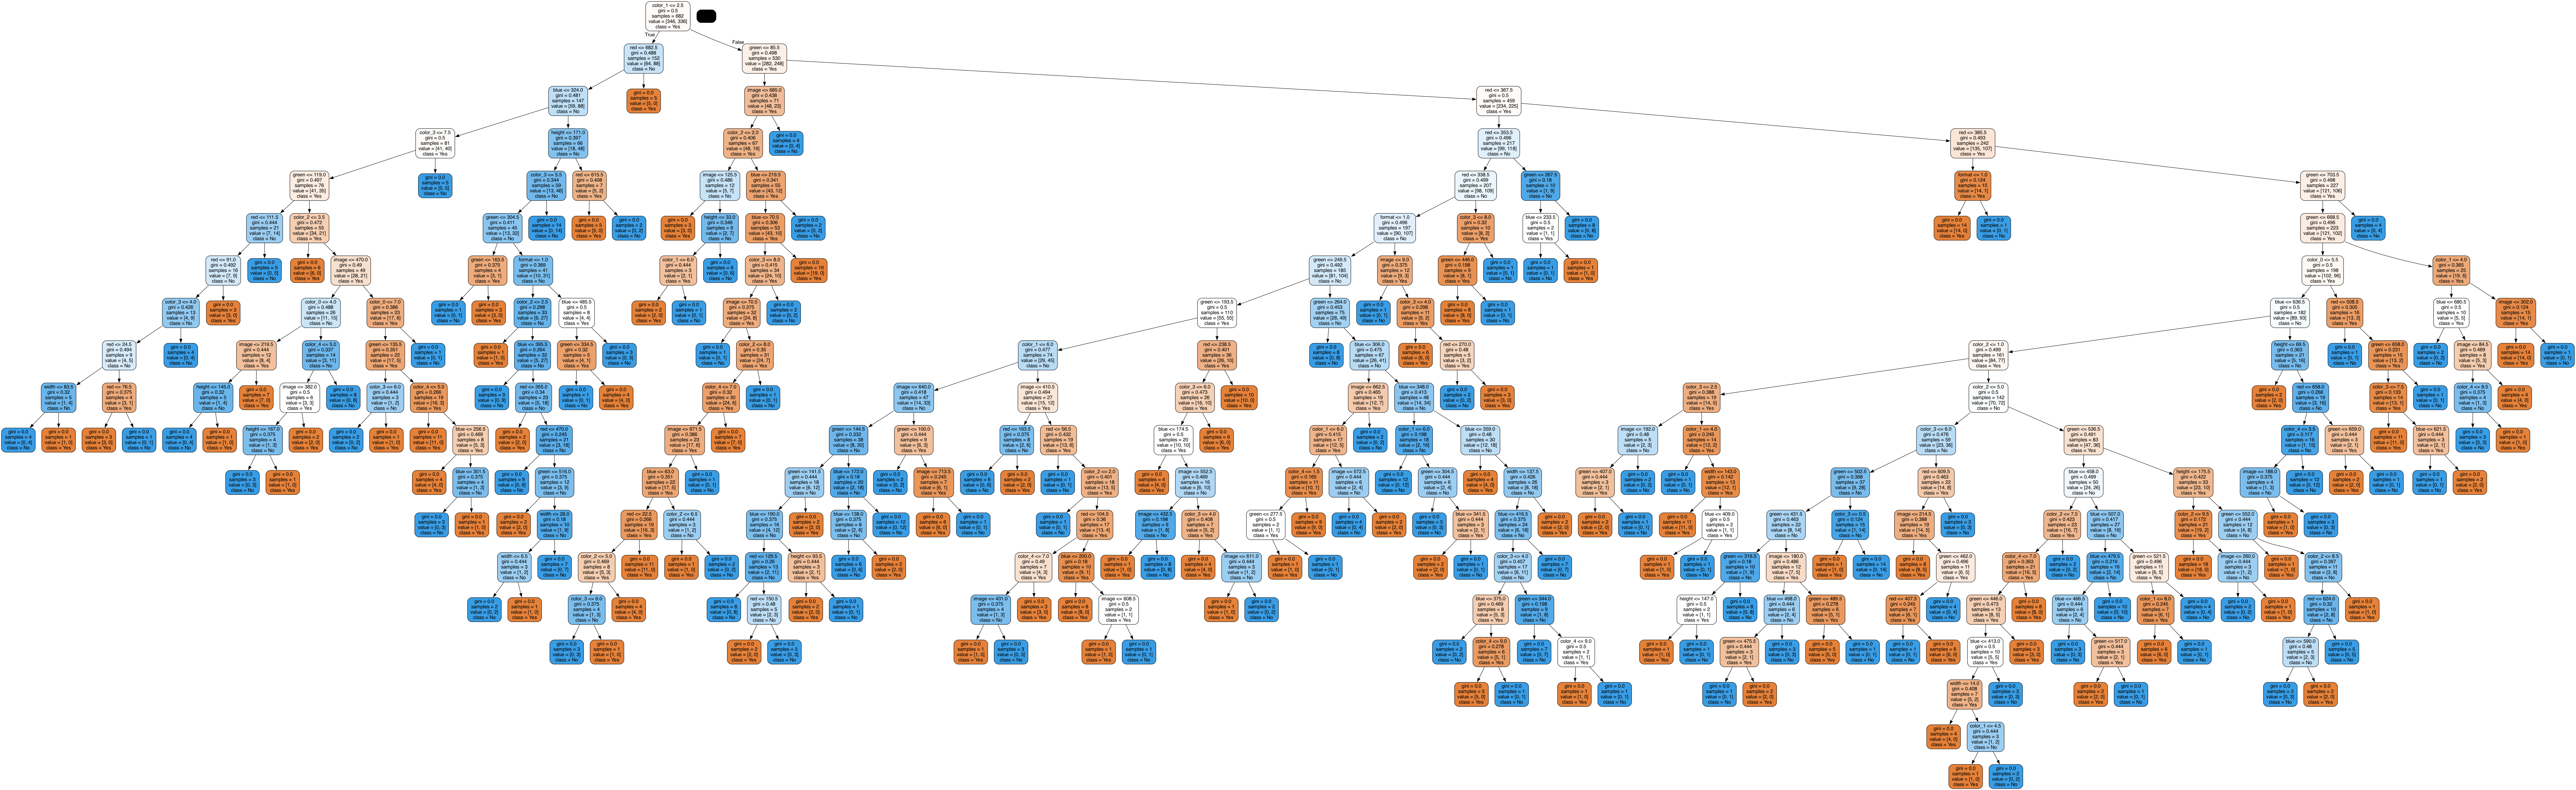

In [5]:

import graphviz
import pydotplus
from IPython.display import Image, display

dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names=data_tc.columns,
        filled=True, rounded=True, 
        class_names =
        resultLabel.inverse_transform(
        pd.DataFrame(data_result).result.unique())
        )
graph = graphviz.Source(dot_data) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)
#pydot_graph.write_png('tree.png')


## Prediction



In [8]:
# avec la derniere image des voitures
prediction = dtc.predict(
    [[
        themeLabel.transform(["Pokemon2"])[0],
        imageLabel.transform(["abomasnow.jpg"])[0],
        widthLabel.transform(["7786"])[0],
        heightLabel.transform(["4380"])[0],
        formatLabel.transform(["JPEG"])[0],
        color_0Label.transform(["red"])[0],
        color_1Label.transform(["grey"])[0],
        color_2Label.transform(["blue"])[0],
        color_3Label.transform(["darkgrey"])[0],
        color_4Label.transform(["lightgrey"])[0],
        redLabel.transform([92.91901662620823])[0],
        greenLabel.transform([105.17334974822148])[0],
        blueLabel.transform([110.4893751011136])[0]
    ]]
)
print(resultLabel.inverse_transform(prediction))
print(dtc.feature_importances_)

['No']
[0.         0.14378757 0.02301635 0.05226352 0.0157414  0.02013638
 0.04947961 0.06337962 0.07953624 0.03666763 0.14884209 0.19182003
 0.17532957]


/usr/local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
